In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [50]:
data = pd.read_csv("admission_data.csv")
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [40]:
X = data.drop("Chance of Admit ", axis=1)  # Note the space after 'Admit '
y = data["Chance of Admit "]

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [43]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

c:\Users\cheta\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [45]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=300, batch_size=4, verbose=1)

Epoch 1/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1542 - mae: 0.2998 - val_loss: 0.0305 - val_mae: 0.1393
Epoch 2/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0196 - mae: 0.1136 - val_loss: 0.0238 - val_mae: 0.1085
Epoch 3/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0111 - mae: 0.0826 - val_loss: 0.0141 - val_mae: 0.0816
Epoch 4/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0075 - mae: 0.0670 - val_loss: 0.0112 - val_mae: 0.0736
Epoch 5/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0062 - mae: 0.0608 - val_loss: 0.0111 - val_mae: 0.0735
Epoch 6/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054 - mae: 0.0565 - val_loss: 0.0080 - val_mae: 0.0675
Epoch 7/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045 - mae: 0.0509 - val_loss: 0.0082 - val_mae: 0.0597
Epoch 8/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 - mae: 0.0508 - val_loss: 0.0069 - val_mae: 0.0579
Epoch 9/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.003

In [46]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, MAE: {mae:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0079 - mae: 0.0616  
Test Loss: 0.0079, MAE: 0.0616


In [47]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [48]:
from sklearn.metrics import r2_score

# After model.predict
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")


R² Score: 0.6116


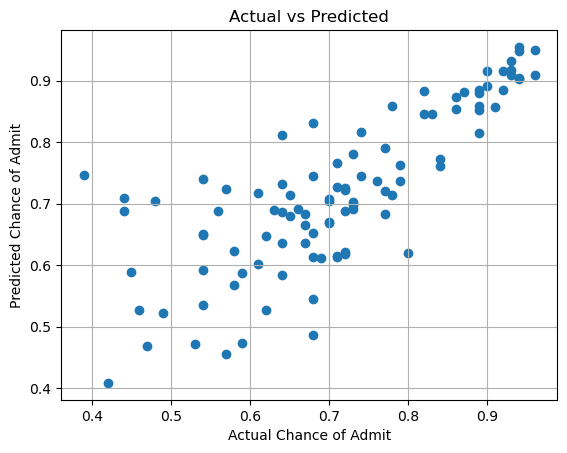

In [49]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()